In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
file=pd.read_csv("/Users/gary/git/fio-tools/fio-iop-logs/random-rw-4-jobs_iops.1.log",names=["time","value","direction","d1","d2"])

In [4]:
file

,time,value,direction,d1,d2
0,1000,34614,0,0,0
1,1000,34659,1,0,0
2,2000,34561,0,0,0
3,2000,34126,1,0,0
4,3000,34707,0,0,0
...,...,...,...,...,...
115,58003,3182,1,0,0
116,59003,3248,0,0,0
117,59003,3348,1,0,0
118,60004,3334,0,0,0


In [5]:
reads=file[file.direction==0]
writes=file[file.direction==1]
reads=reads.set_index("time")
writes=writes.set_index("time")

In [6]:
print(reads[:5])
print(writes[:5])

      value  direction  d1  d2
time                          
1000  34614          0   0   0
2000  34561          0   0   0
3000  34707          0   0   0
4001  34342          0   0   0
5001  34678          0   0   0
      value  direction  d1  d2
time                          
1000  34659          1   0   0
2000  34126          1   0   0
3000  34920          1   0   0
4001  34739          1   0   0
5001  34252          1   0   0


In [29]:
# Create dataframe
rw=pd.DataFrame()
# Need to use insert here, rather than a simple assign else the df
# will be converted to a Series
rw.insert(0,"reads",reads["value"])
rw.insert(1,"writes",writes["value"])
#Now add a total column using assign
rw=rw.assign(total=rw.sum(axis=1))





<class 'pandas.core.frame.DataFrame'>


In [39]:
rw[:5]

,time,reads,writes,total
0,1000,34614,34659,69273
1,2000,34561,34126,68687
2,3000,34707,34920,69627
3,4001,34342,34739,69081
4,5001,34678,34252,68930


In [32]:
rw=rw.reset_index()

In [34]:
rw[:5]

,time,reads,writes,total
0,1000,34614,34659,69273
1,2000,34561,34126,68687
2,3000,34707,34920,69627
3,4001,34342,34739,69081
4,5001,34678,34252,68930


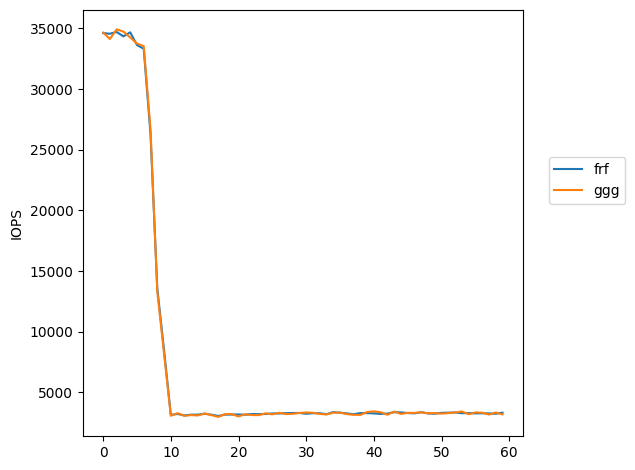

In [48]:
plt.plot(rw["reads"],label="frf")
plt.plot(rw["writes"],label="ggg")
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
plt.tight_layout()
plt.ylabel("IOPS")
plt.show()

In [35]:
c=pd.read_csv("/Users/gary/git/fio-tools/fio-iop-logs/random-rw-4-jobs_iops.1.log",names=["time","value","direction","d1","d2"])

In [37]:
c.count()

time         120
value        120
direction    120
d1           120
d2           120
dtype: int64

In [51]:

import subprocess
subprocess.run('/bin/ls')
#subprocess.run('/bin/ls')

2g-read-60s_bw.1.log
2g-read-60s_bw.2.log
2g-read-60s_bw.3.log
README.md
Untitled-1.ipynb
aggregate_tmp.png
fio-3.28-example
fio-bw.1.log
fio-bw.2.log
fio-bw.3.log
fio-iop-logs
fio-log-pandas-notebook.ipynb
fio_log_summary.py
fio_pandas.py
pandas-pandas.png
read_tmp.png
rw.ipynb
testimgcat.py
write_tmp.png


CompletedProcess(args='/bin/ls', returncode=0)